# Calling Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
dataset = pd.read_csv('fake_bills.csv',sep=';')

In [3]:
dataset

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In this notebook we are going to predict if a bank note is true or false based on different measurements. There are five measurements:

length, the length of the banknote in mm

height left, the height of the left side of the banknote in mm

height right, the height of the right side of the bank note in mm

diagonal, the diagonal of the bank note in mm

margin low, lower side margin in mm

margin up, upper side margin in mm

The last column is_genuine is the target

In [4]:
dataset.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

# treating missing data

In [5]:
dataset.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [6]:
dataset.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [7]:
print('Mode : ',dataset.margin_low.mode())
print('Median : ',dataset.margin_low.median())
print('Mean : ',dataset.margin_low.mean())

Mode :  0    4.08
1    4.10
2    4.18
dtype: float64
Median :  4.31
Mean :  4.485967190704034


In [8]:
dataset.margin_low.fillna(dataset.margin_low.mean(),axis = 0, inplace = True)

In [9]:
dataset.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [28]:
dataset_encode = dataset.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset_encode.is_genuine = le.fit_transform(dataset_encode.is_genuine)

<Axes: xlabel='is_genuine', ylabel='length'>

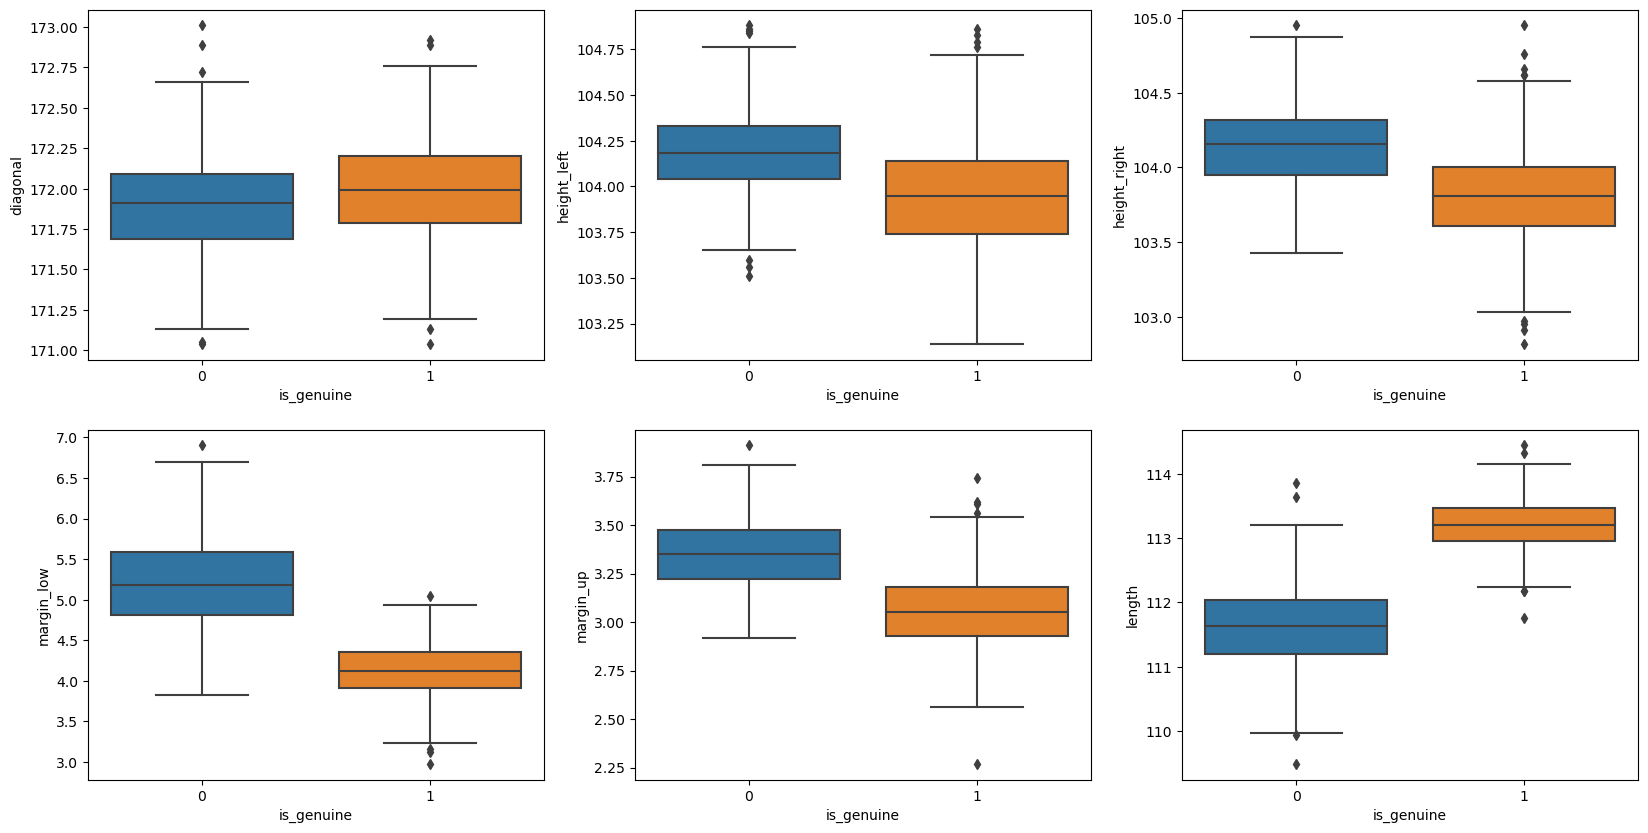

In [41]:
figbi, axesbi = plt.subplots(2, 3, figsize=(20,10))
sns.boxplot(x="is_genuine", y="diagonal",     data=dataset_encode,     ax=axesbi[0,0])
sns.boxplot(x="is_genuine", y="height_left",  data=dataset_encode,     ax=axesbi[0,1])
sns.boxplot(x="is_genuine", y="height_right", data=dataset_encode,     ax=axesbi[0,2])
sns.boxplot(x="is_genuine", y="margin_low",   data=dataset_encode,     ax=axesbi[1,0])
sns.boxplot(x="is_genuine", y="margin_up",    data=dataset_encode,     ax=axesbi[1,1])
sns.boxplot(x="is_genuine", y="length",    data=dataset_encode,     ax=axesbi[1,2])

<Axes: xlabel='length', ylabel='Count'>

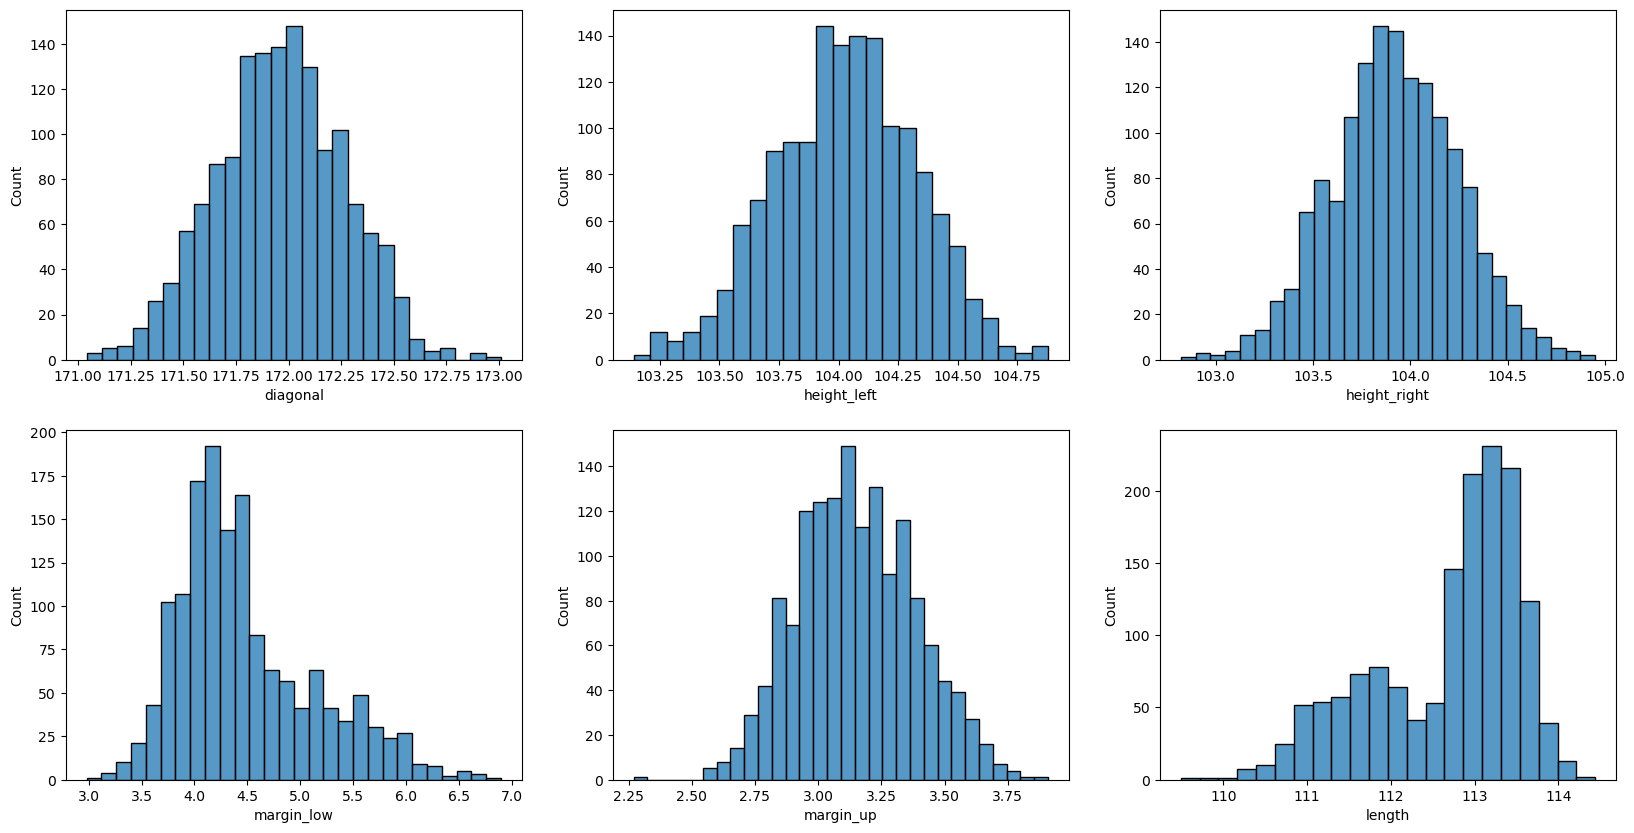

In [42]:
figbi, axesbi = plt.subplots(2, 3, figsize=(20,10))
sns.histplot( x="diagonal",     data=dataset_encode,     ax=axesbi[0,0])
sns.histplot( x="height_left",  data=dataset_encode,     ax=axesbi[0,1])
sns.histplot( x="height_right", data=dataset_encode,     ax=axesbi[0,2])
sns.histplot( x="margin_low",   data=dataset_encode,     ax=axesbi[1,0])
sns.histplot( x="margin_up",    data=dataset_encode,     ax=axesbi[1,1])
sns.histplot( x="length",    data=dataset_encode,     ax=axesbi[1,2])

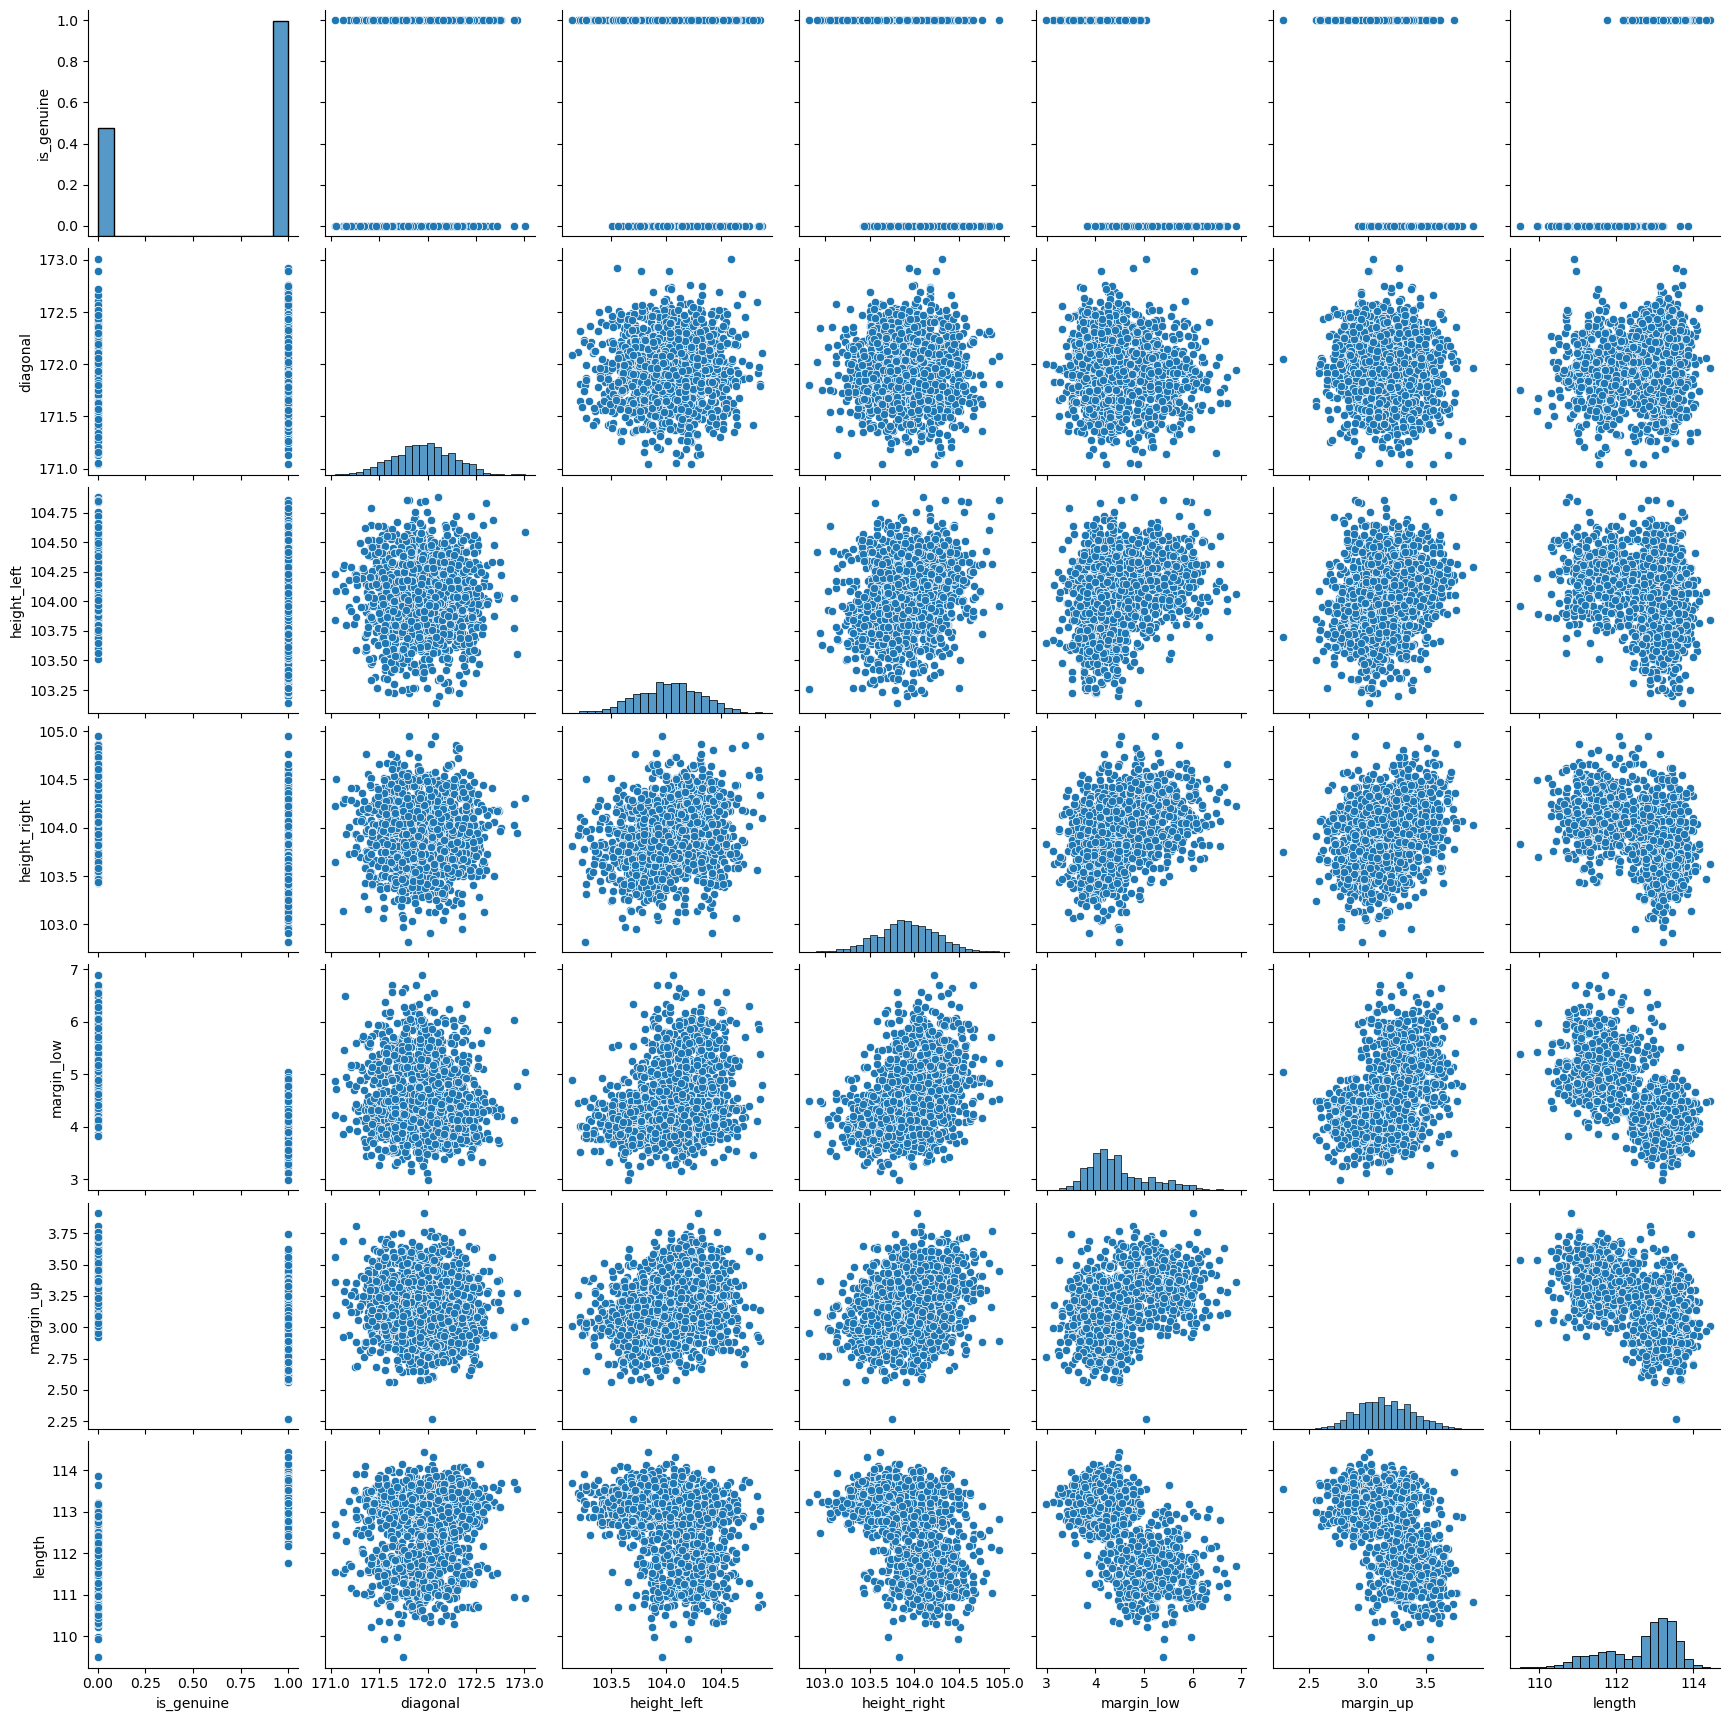

In [45]:
sns.pairplot(dataset_encode)

# label encoding

In [123]:
# dataset.to_csv('fake_bills_proper_clean_data.csv')

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.is_genuine = le.fit_transform(dataset.is_genuine)

In [83]:
X = dataset.drop(columns = 'is_genuine')
y = dataset['is_genuine'].values

In [84]:
# Visualisation

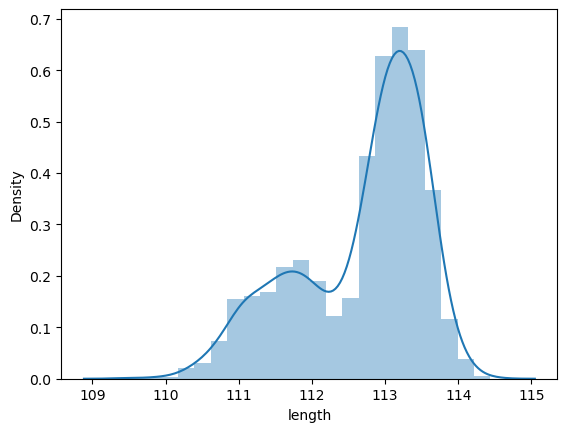

In [85]:
sns.distplot(dataset['length'])
plt.show()

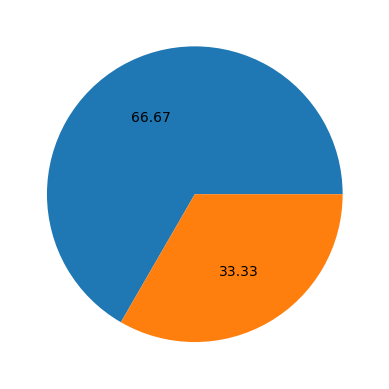

In [86]:
plt.pie(dataset['is_genuine'].value_counts(),autopct='%0.2f');

In [87]:
dataset.corr()['is_genuine']

is_genuine      1.000000
diagonal        0.132756
height_left    -0.379833
height_right   -0.485092
margin_low     -0.775015
margin_up      -0.606262
length          0.849285
Name: is_genuine, dtype: float64

looks like each feature of this dataset equally important

# training and testing and making Data in standard form


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [91]:

model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [92]:
y_pred1 = model1.predict(X_test)
accuracy_score(y_test,y_pred1)

0.9933333333333333

In [93]:
confusion_matrix(y_test,y_pred1)

array([[ 96,   1],
       [  1, 202]], dtype=int64)

In [94]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
y_pred2 = model2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.99

In [96]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [97]:
y_pred3 = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[ 96   1]
 [  2 201]]


0.99

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [100]:
X_resampled.shape

(2000, 6)

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,train_size=0.75,random_state=0,)

In [102]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [103]:
y_pred1 = model1.predict(X_test)
accuracy_score(y_test,y_pred1)

0.99

In [104]:
confusion_matrix(y_test,y_pred1)

array([[241,   5],
       [  0, 254]], dtype=int64)

In [105]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.992

In [106]:
confusion_matrix(y_test,y_pred2)

array([[242,   4],
       [  0, 254]], dtype=int64)

In [107]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[241   5]
 [  0 254]]


0.99

In [108]:
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGboost',XGBClassifier()))

In [109]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.987500 (0.011456)
KNN: 0.991500 (0.009233)
RF: 0.991500 (0.008078)
NB: 0.990000 (0.008062)
XGboost: 0.988500 (0.009500)


In [110]:
print("We finalize the algorithm : Random Forest =  LR: 0.989000 (0.009434)")

We finalize the algorithm : Random Forest =  LR: 0.989000 (0.009434)


In [111]:
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model2 = GaussianNB()

results = cross_val_score(model2, X_resampled, y_resampled, cv=kfold)

print("Average Accuracy",results.mean())
print("SD ",results.std())
print(results.min(),results.max())

Average Accuracy 0.9899999999999999
SD  0.008062257748298558
0.975 1.0


In [112]:
# end of model building and selected Naive bays algorithm